# Lab | Feature extraction

In [39]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("pastel", 8)
from ydata_profiling import ProfileReport

%matplotlib inline

In [40]:
df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [41]:
df = df.round(2)

In [42]:
# Standardize column names (lowercase, replace spaces with underscore)
def standard_cols(dataframe):
    '''Standardize column names into lowercase and replace spaces with underscore.'''
    dataframe.columns = [col.lower().replace(' ','_') for col in dataframe.columns]
standard_cols(df)
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.52,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize
2,AI49188,Nevada,12887.43,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize
3,WW63253,California,7645.86,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize
4,HB64268,Washington,2813.69,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize


In [43]:
#Transform date column to datetime
def transform_to_date(column):
    column = pd.to_datetime(column, errors='coerce')
    return column
df.effective_to_date = transform_to_date(df.effective_to_date)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

### Open the categoricals variable we created before.

In [45]:
categoricals = df.select_dtypes(object)
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [46]:
#drop columns with high cardinality before plotting
categoricals.drop(['customer'], axis=1, inplace=True)

In [47]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             9134 non-null   object
 1   response          9134 non-null   object
 2   coverage          9134 non-null   object
 3   education         9134 non-null   object
 4   employmentstatus  9134 non-null   object
 5   gender            9134 non-null   object
 6   location_code     9134 non-null   object
 7   marital_status    9134 non-null   object
 8   policy_type       9134 non-null   object
 9   policy            9134 non-null   object
 10  renew_offer_type  9134 non-null   object
 11  sales_channel     9134 non-null   object
 12  vehicle_class     9134 non-null   object
 13  vehicle_size      9134 non-null   object
dtypes: object(14)
memory usage: 999.2+ KB


In [48]:
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### Plot all the categorical variables with the proper plot. What can you see?
**There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?**

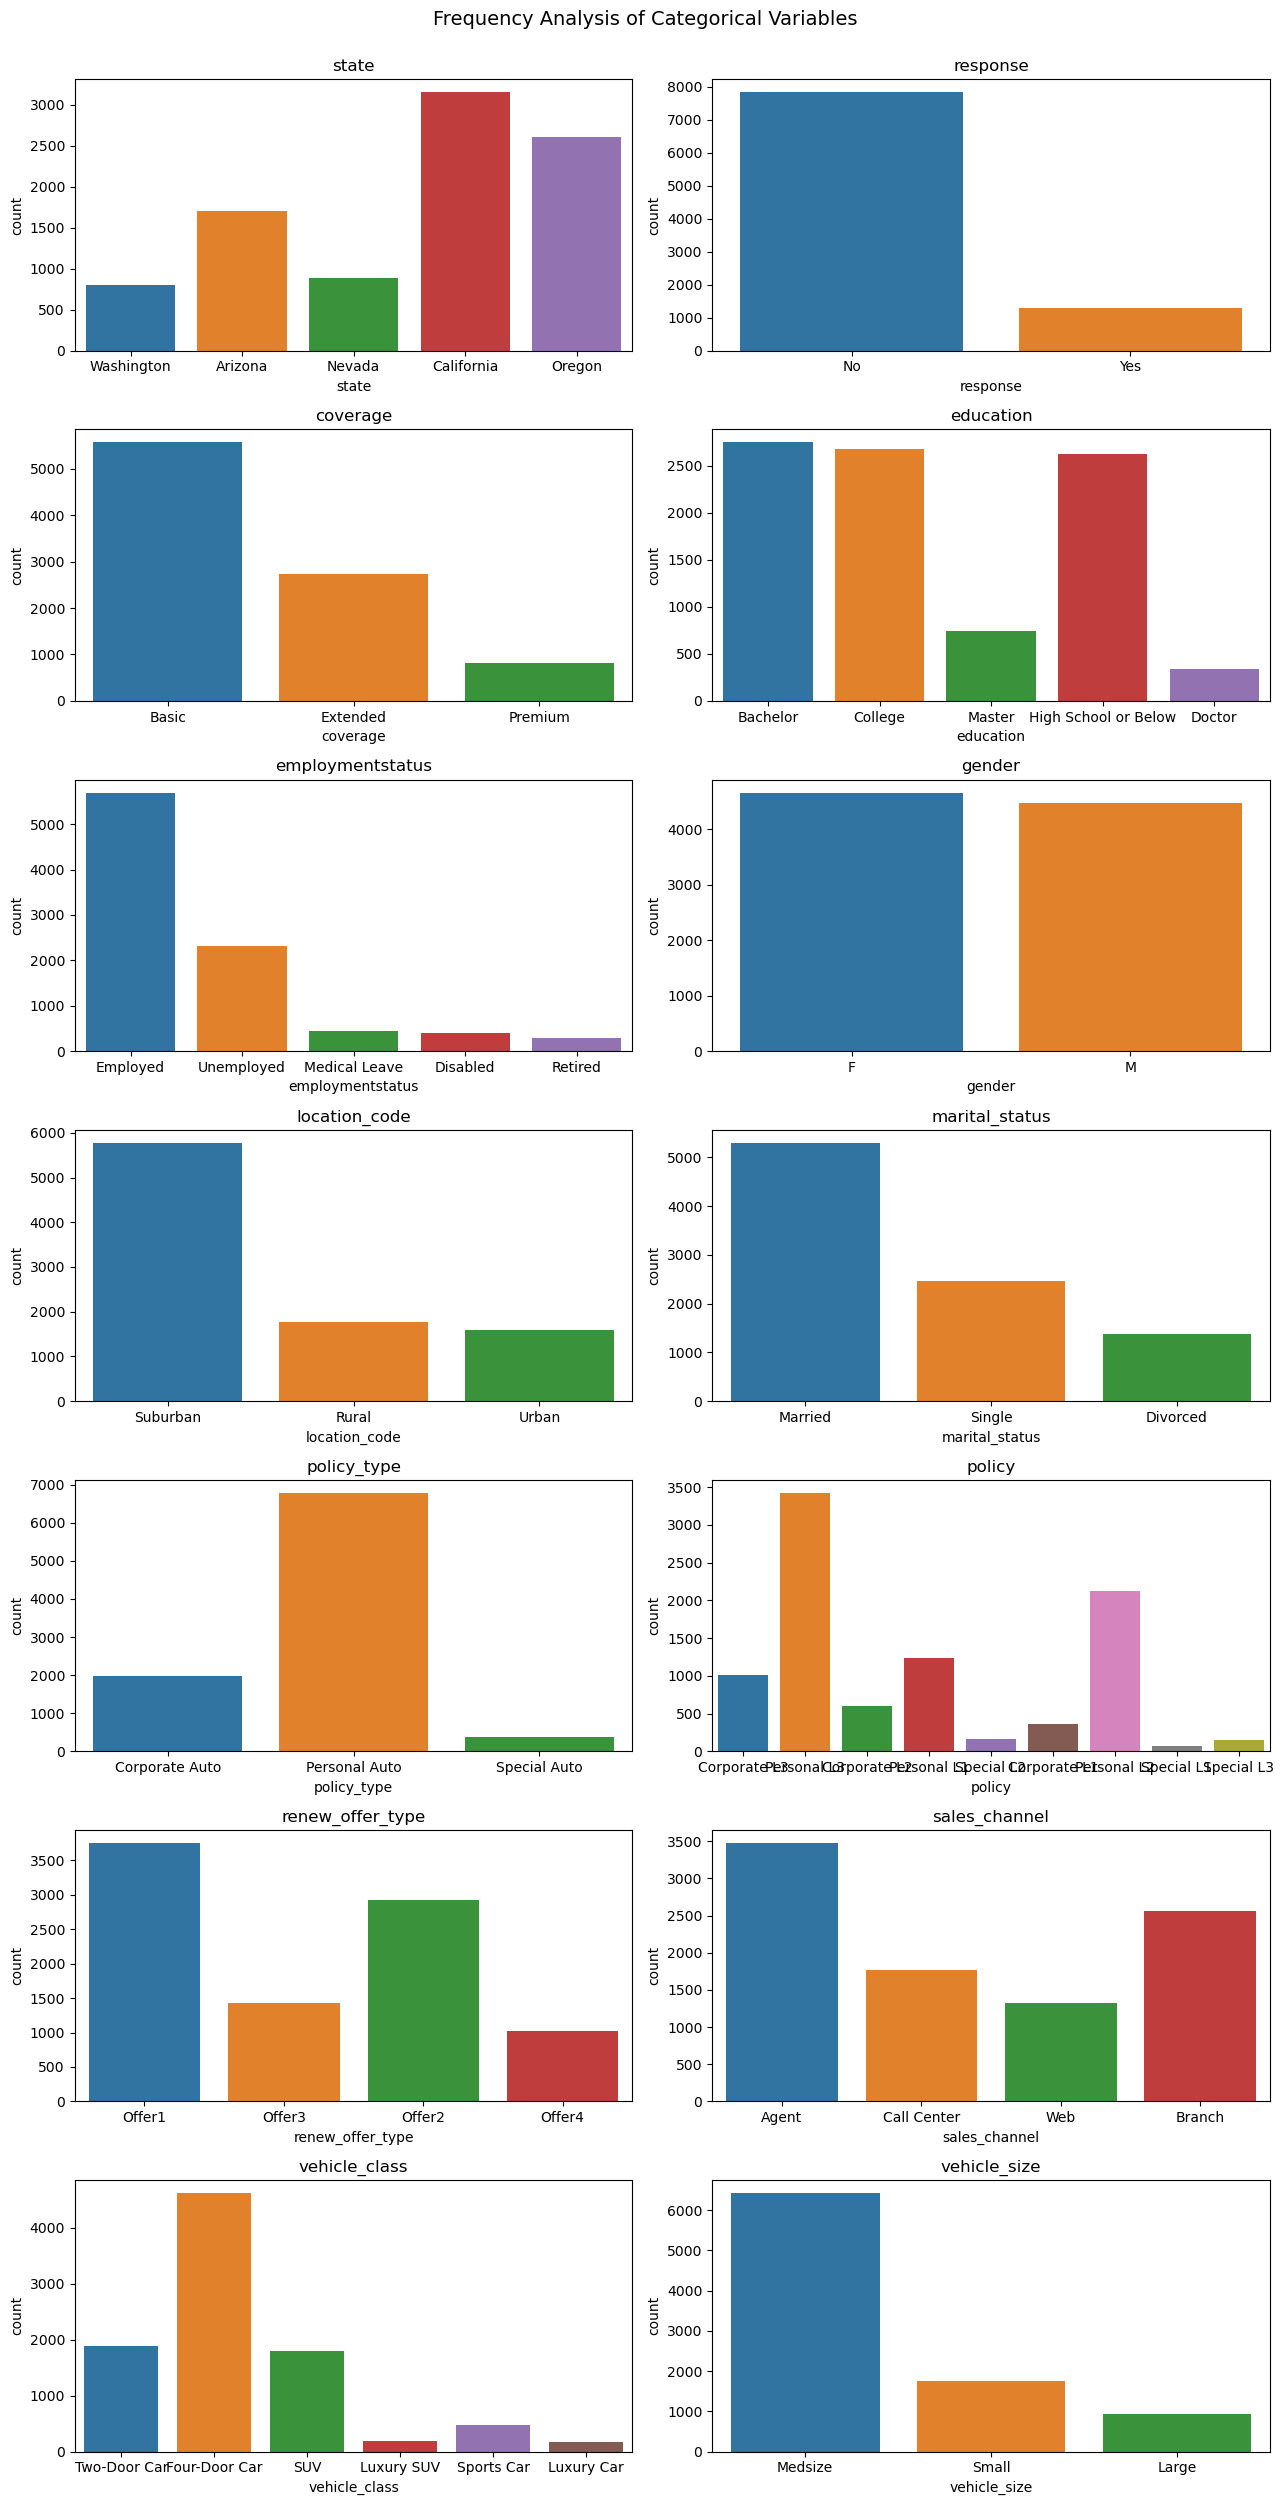

In [49]:
a = 7  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (13,25))
plt.suptitle("Frequency Analysis of Categorical Variables", fontsize = 14, y=1)

for i in categoricals:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(data = categoricals, x = i)
    c = c + 1

plt.tight_layout()
plt.show()

#### **Observations: (copied from lab_script)**
- After looking at each categorical variables' values, there are several columns which could be transformed into ordinal categorical such as education, coverage and vehicle_size.

- Some columns would be dropped either because they are redundant or because we are not sure what they signify: policy and renew_offer_type.

- Employmentstatus could be changed to 3 categories: employed, unemployed and other(combining medical leave, retired and disabled).

### Plot time variable. Can you extract something from it?

In [105]:
#Checking time variable to get more details
len(df.effective_to_date) # number of insurance

9134

In [110]:
df.duplicated().sum() # all records we have are unique

0

In [104]:
df.effective_to_date.nunique() # 59 different dates are in the time variable effective_to_date

59

In [107]:
df.effective_to_date.min(), df.effective_to_date.max() # all insurance policies were started between January and February 2011

(Timestamp('2011-01-01 00:00:00'), Timestamp('2011-02-28 00:00:00'))

Text(0.5, 1.0, 'Customer Lifetime Value & Effective to Date')

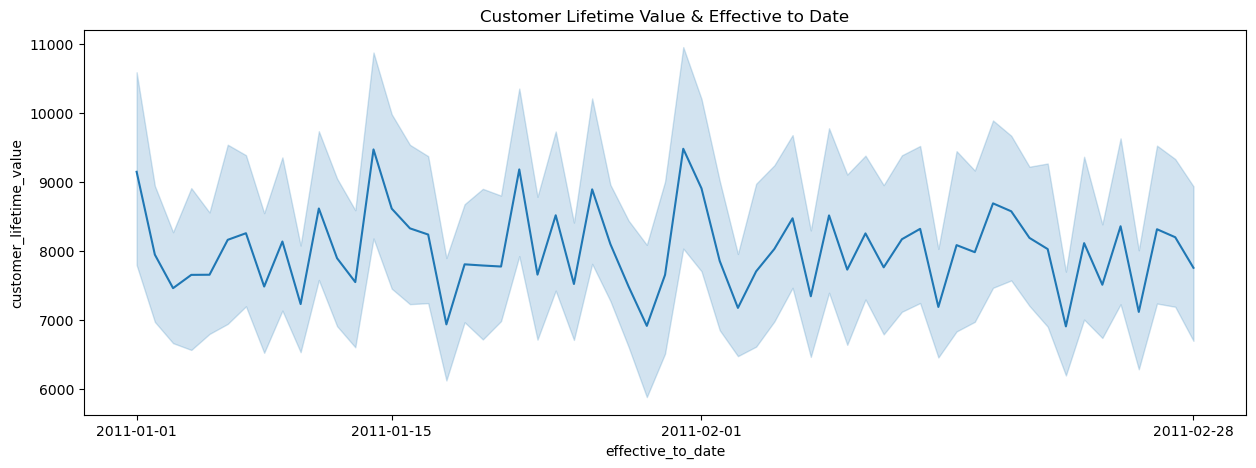

In [121]:
plt.figure(figsize=(15,5))
sns.lineplot(data = df, x= 'effective_to_date', y = 'customer_lifetime_value')
plt.xticks(['2011-01-01', '2011-01-15', '2011-02-01', '2011-02-28'])
plt.title('Customer Lifetime Value & Effective to Date')

([<matplotlib.axis.XTick at 0x7fdb131809d0>,
 [Text(14975.0, 0, '2011-01-01'),
  Text(14982.0, 0, '2011-01-08'),
  Text(14989.0, 0, '2011-01-15'),
  Text(14996.0, 0, '2011-01-22')])

<Figure size 1500x1500 with 0 Axes>

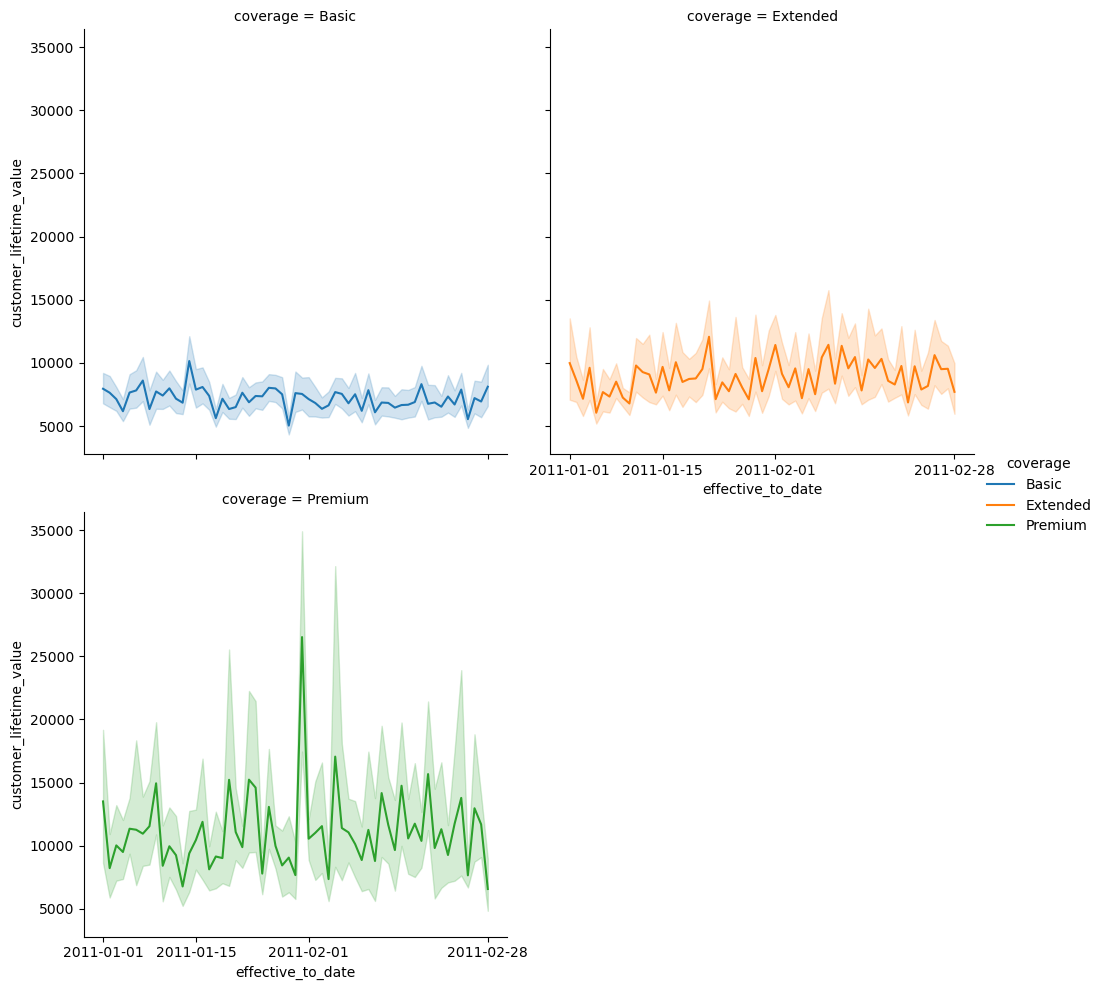

In [123]:
fig = plt.figure(figsize=(15, 15))
sns.relplot(data = df, x='effective_to_date', y = 'customer_lifetime_value', col='coverage', kind='line', col_wrap=2, hue='coverage')
plt.xticks(['2011-01-01', '2011-01-15', '2011-02-01', '2011-02-28'])
#plt.xticks(rotation=15)

**It would have been good to get tenure from the effective_to_date column and see how this impacts customer_lifetime_value. However, considering we only have 2 months worth of dates (January and February 2011), extracting tenure would not be very helpful in our customer segmentation analysis.**